In [4]:
!unzip archive.zip

Archive:  archive.zip
  inflating: samples/226md.png       
  inflating: samples/22d5n.png       
  inflating: samples/2356g.png       
  inflating: samples/23mdg.png       
  inflating: samples/23n88.png       
  inflating: samples/243mm.png       
  inflating: samples/244e2.png       
  inflating: samples/245y5.png       
  inflating: samples/24f6w.png       
  inflating: samples/24pew.png       
  inflating: samples/25257.png       
  inflating: samples/253dc.png       
  inflating: samples/25egp.png       
  inflating: samples/25m6p.png       
  inflating: samples/25p2m.png       
  inflating: samples/25w53.png       
  inflating: samples/264m5.png       
  inflating: samples/268g2.png       
  inflating: samples/28348.png       
  inflating: samples/28x47.png       
  inflating: samples/2b827.png       
  inflating: samples/2bg48.png       
  inflating: samples/2cegf.png       
  inflating: samples/2cg58.png       
  inflating: samples/2cgyx.png       
  inflating: samples/2en7g.p

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import cv2
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Conv2D, Dropout, Dense, BatchNormalization, AveragePooling2D

In [2]:
X = []
Y = []
files = [f for f in os.listdir("./samples") if os.path.isfile("./samples/" + f)]

for file in files:
  img = cv2.imread("./samples/" + file)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(img, (5,5), 0)
  img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  x = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50,90:110], img[10:50, 110:130]]
  y = list(file[:5])
  X += x
  Y += y

X = np.array(X)
X = X.astype('float32')
X /= 255

Y = np.array(Y)
Y = OneHotEncoder(sparse_output = False).fit_transform(Y.reshape(-1, 1))

In [3]:
model = Sequential([
  Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (X.shape[1], X.shape[2], 1)),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2), strides = 2),

  Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2)),

  Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2), strides = 2),

  Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
  BatchNormalization(),
  MaxPooling2D(pool_size = (2, 2), strides = 2),

  # AveragePooling2D(pool_size=(2, 1)),

  Flatten(),
  Dropout(0.3),
  Dense(64, activation = 'relu'),
  Dropout(0.3),
  Dense(32, activation = 'relu'),
  Dropout(0.5),

  Dense(Y.shape[1], activation = 'sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 20, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 40, 20, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 10, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 10, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 20, 10, 32)        128       
 chNormalization)                                                
                                                        

In [5]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [6]:
val_split = 0.2
epoch = 50
batch_size = 128

model.fit(X, Y, epochs=epoch, batch_size=batch_size, shuffle = True, validation_split = val_split)

Epoch 1/50
34/34 [==============================] - 8s 154ms/step - loss: 3.2661 - accuracy: 0.0710 - val_loss: 2.9454 - val_accuracy: 0.0411
Epoch 2/50
34/34 [==============================] - 6s 180ms/step - loss: 2.8448 - accuracy: 0.1061 - val_loss: 2.9579 - val_accuracy: 0.1019
Epoch 3/50
34/34 [==============================] - 5s 135ms/step - loss: 2.6816 - accuracy: 0.1526 - val_loss: 2.9623 - val_accuracy: 0.0411
Epoch 4/50
34/34 [==============================] - 5s 150ms/step - loss: 2.4381 - accuracy: 0.2339 - val_loss: 2.9386 - val_accuracy: 0.0402
Epoch 5/50
34/34 [==============================] - 6s 171ms/step - loss: 2.1498 - accuracy: 0.3400 - val_loss: 2.8687 - val_accuracy: 0.0748
Epoch 6/50
34/34 [==============================] - 6s 167ms/step - loss: 1.8632 - accuracy: 0.4213 - val_loss: 2.7620 - val_accuracy: 0.1692
Epoch 7/50
34/34 [==============================] - 7s 193ms/step - loss: 1.5953 - accuracy: 0.5035 - val_loss: 2.5256 - val_accuracy: 0.3383
Epoch 

In [8]:
history = model.history

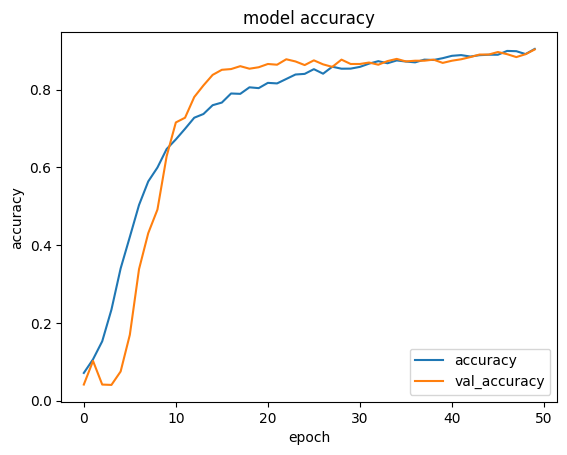

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc = 'lower right')

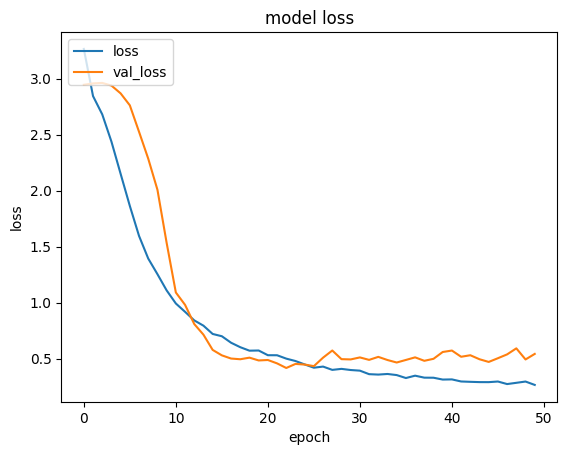

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')